1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


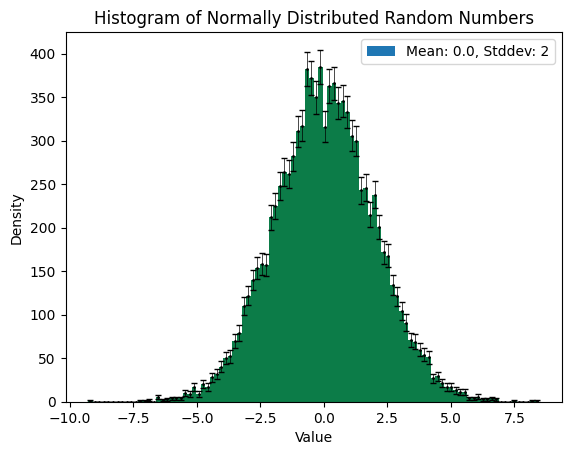

In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt

mean = 0.0
stddev = 2
N = 10000
x = np.array(np.random.normal(mean, stddev, N))
bins = int(np.sqrt(N))



# Plotting the histogram
fig, ax = plt.subplots()

counts, bin_edges, _ = ax.hist(x, bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Incertezze Poissoniane
errors = np.sqrt(counts)

ax.errorbar(
    bin_centers,
    counts,
    yerr=errors,
    fmt='o',                 # marker
    color='black',             # colore marker + barre
    ecolor='black',           # colore SOLO barre
    elinewidth=0.5,          # spessore barre
    capsize=2,               # lunghezza cappucci
    capthick=0.5,            # spessore cappucci
    markersize=1,            # dimensione marker
    markeredgewidth=1,       # bordo marker
    label="Counts + Poisson errors"
)
ax.hist(x, bins=bins, alpha=0.6, color='g')
ax.set_title('Histogram of Normally Distributed Random Numbers')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend(['Mean: {}, Stddev: {}'.format(mean, stddev)])
plt.show()


------------------------------
CHECK AREE:
1. Area Istogramma (target): 89.4405
2. Area Somma Gaussiane (raw): 99.9896 (dovrebbe essere circa N=100)
3. Area KDE Normalizzato: 89.4405
   -> Check: 89.4405 approx 89.4405
------------------------------


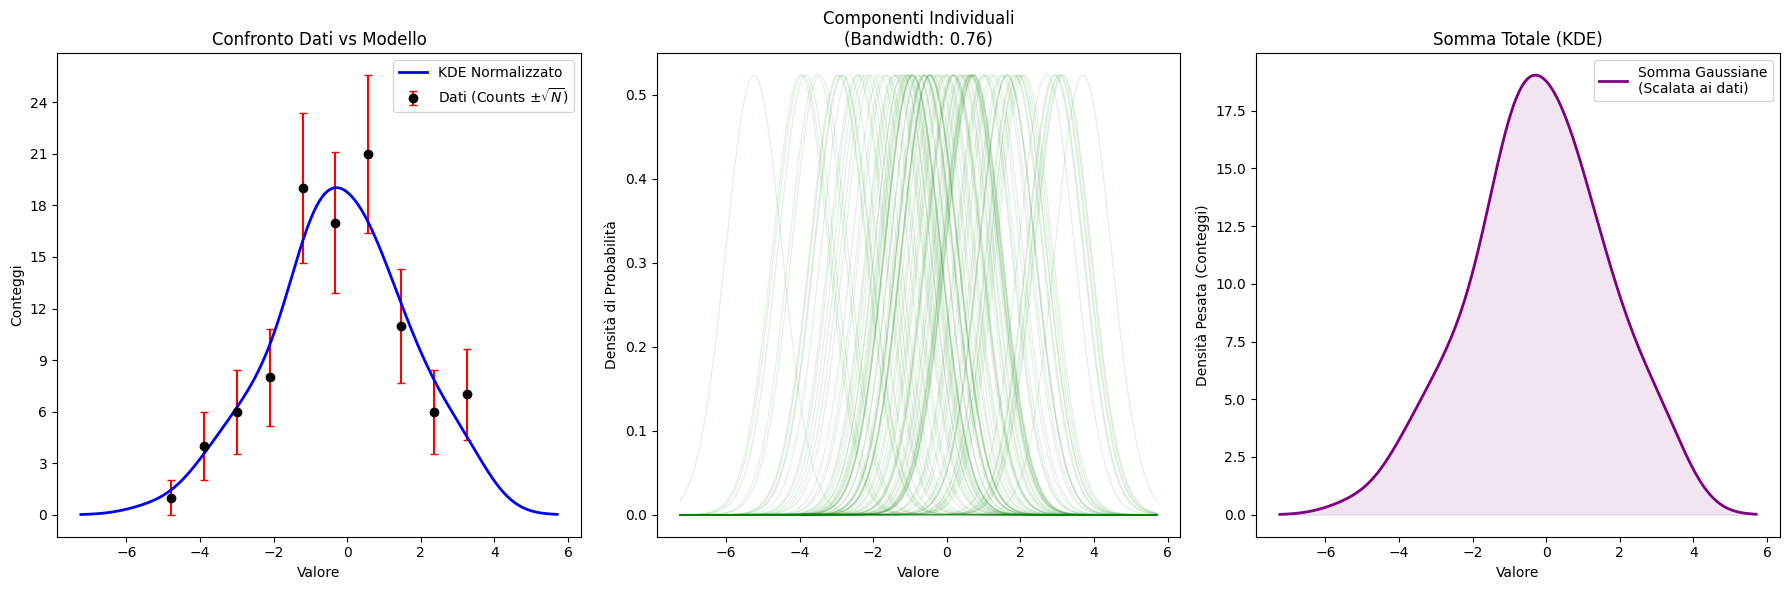

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from matplotlib.ticker import MaxNLocator

# 1. Configurazione dei dati
np.random.seed(42)
mean = 0.0
stddev = 2.0
N = 100 
x = np.random.normal(mean, stddev, N)

# Griglia per il calcolo delle funzioni
x_grid = np.linspace(x.min() - 2, x.max() + 2, 1000)

# 2. Setup del grafico (TRE subplot affiancati)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# --- CALCOLI PRELIMINARI ---

# Istogramma
n_bins = int(np.sqrt(N)) 
counts, bin_edges = np.histogram(x, bins=n_bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]
errors = np.sqrt(counts)

# Bandwidth (Silverman's rule approx)
bandwidth = 1.06 * x.std() * (x.size ** (-0.2))

# Creazione Gaussiane
sum_gaussians = np.zeros_like(x_grid)
gaussians_list = [] # Salviamo le singole curve per plottarle dopo

for data_point in x:
    pdf = stats.norm.pdf(x_grid, loc=data_point, scale=bandwidth)
    gaussians_list.append(pdf)
    sum_gaussians += pdf

# Integrazione e Normalizzazione
integral_gaussians_raw = integrate.trapezoid(sum_gaussians, x_grid)
integral_histogram = np.sum(counts * bin_width)

scale_factor = integral_histogram / integral_gaussians_raw
kde_normalized = sum_gaussians * scale_factor
integral_kde_final = integrate.trapezoid(kde_normalized, x_grid)

# --- STAMPA DEL CHECK AREE (OUTPUT CONSOLE) ---
print("-" * 30)
print("CHECK AREE:")
print(f"1. Area Istogramma (target): {integral_histogram:.4f}")
print(f"2. Area Somma Gaussiane (raw): {integral_gaussians_raw:.4f} (dovrebbe essere circa N={N})")
print(f"3. Area KDE Normalizzato: {integral_kde_final:.4f}")
print(f"   -> Check: {integral_kde_final:.4f} approx {integral_histogram:.4f}")
print("-" * 30)

# --- PLOT 1: Istogramma + KDE Normalizzato (Il risultato finale) ---
# Nota la r prima della stringa per evitare il SyntaxWarning su \pm e \sqrt
ax1.errorbar(
    bin_centers,
    counts,
    yerr=errors,
    fmt='o',
    color='black',
    ecolor='red',
    capsize=3,
    label=r'Dati (Counts $\pm \sqrt{N}$)' 
)
ax1.plot(x_grid, kde_normalized, color='blue', lw=2, label='KDE Normalizzato')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('Valore')
ax1.set_ylabel('Conteggi')
ax1.set_title('Confronto Dati vs Modello')
ax1.legend()

# --- PLOT 2: Solo le componenti Gaussiane (Spaghetti plot) ---
ax2.set_title(f'Componenti Individuali\n(Bandwidth: {bandwidth:.2f})')
ax2.set_xlabel('Valore')
ax2.set_ylabel('Densità di Probabilità')
for pdf in gaussians_list:
    ax2.plot(x_grid, pdf, color='green', alpha=0.1, lw=1)

# --- PLOT 3: Somma Totale (La curva pura) ---
ax3.set_title('Somma Totale (KDE)')
ax3.set_xlabel('Valore')
ax3.set_ylabel('Densità Pesata (Conteggi)')
ax3.plot(x_grid, kde_normalized, color='purple', lw=2, label='Somma Gaussiane\n(Scalata ai dati)')
ax3.fill_between(x_grid, kde_normalized, color='purple', alpha=0.1) # Riempimento estetico
ax3.legend()

plt.tight_layout()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

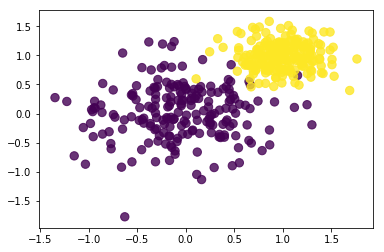

In [45]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image(r"C:\Users\Nicola Lavarda\data\two_categories_scatter_plot.png")

Generati 370 punti totali.


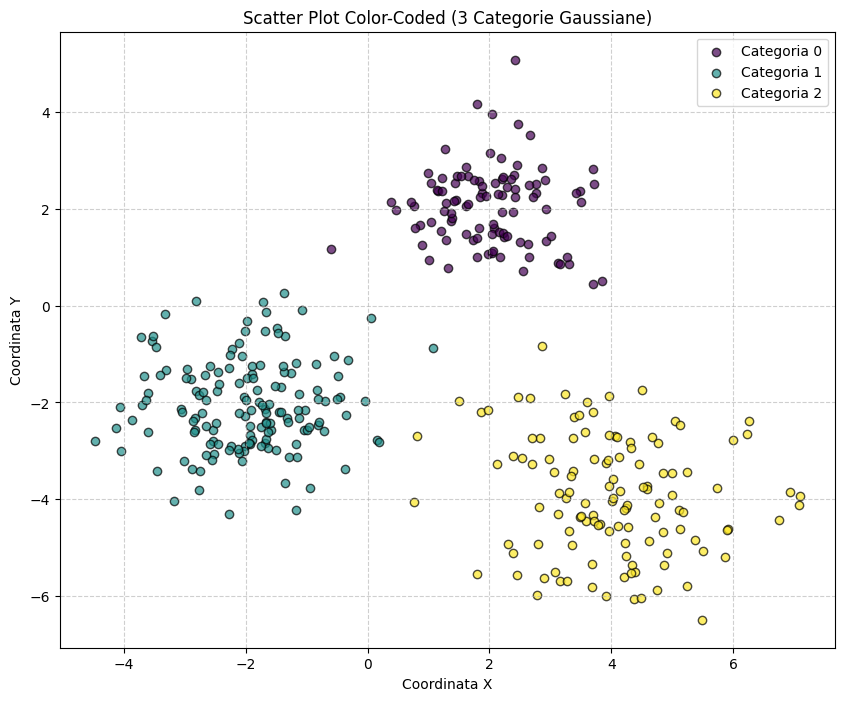

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_data(n_samples_list, centers, stds):
    """
    Genera un dataset 2D con n categorie, ciascuna distribuita come una gaussiana.
    
    Args:
        n_samples_list (list of int): Numero di punti per ogni categoria.
        centers (list of tuples): Lista delle medie (centro x, centro y) per ogni categoria.
        stds (list of float): Lista delle deviazioni standard per ogni categoria.
        
    Returns:
        X (ndarray): Array di shape (totale_samples, 2) con le coordinate.
        y (ndarray): Array di shape (totale_samples,) con le etichette delle categorie.
    """
    X_list = []
    y_list = []
    
    n_categories = len(centers)
    
    # Controllo che le lunghezze delle liste corrispondano
    if not (len(n_samples_list) == len(centers) == len(stds)):
        raise ValueError("Le liste di input (samples, centers, stds) devono avere la stessa lunghezza.")

    for i in range(n_categories):
        # Genera dati gaussiani 2D: mean + std * random_normal
        # np.random.randn genera numeri da una normale standard (media 0, var 1)
        current_samples = n_samples_list[i]
        
        # Generiamo le coordinate x e y separatamente o insieme
        data = np.random.randn(current_samples, 2) * stds[i] + np.array(centers[i])
        
        # Creiamo le etichette (0, 1, 2...)
        labels = np.full(current_samples, i)
        
        X_list.append(data)
        y_list.append(labels)
    
    # Concatena tutte le liste in un unico array numpy
    X = np.vstack(X_list)
    y = np.concatenate(y_list)
    
    return X, y

def plot_scatter(X, y):
    """
    Visualizza il dataset in uno scatter plot color-coded.
    Gestisce automaticamente n categorie assegnando colori diversi.
    """
    unique_categories = np.unique(y)
    # Genera una mappa di colori (colormap) basata sul numero di categorie
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))
    
    plt.figure(figsize=(10, 8))
    
    for i, category in enumerate(unique_categories):
        # Seleziona solo i punti che appartengono alla categoria corrente
        mask = (y == category)
        points = X[mask]
        
        plt.scatter(
            points[:, 0], 
            points[:, 1], 
            color=colors[i], 
            label=f'Categoria {int(category)}',
            alpha=0.7,      # Trasparenza per vedere le sovrapposizioni
            edgecolor='k'   # Bordo nero per risaltare i punti
        )
    
    plt.title(f"Scatter Plot Color-Coded ({len(unique_categories)} Categorie Gaussiane)")
    plt.xlabel("Coordinata X")
    plt.ylabel("Coordinata Y")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# --- Esecuzione Principale ---
if __name__ == "__main__":
    # Configurazione per 3 categorie (generalizzabile a n)
    # Categoria 0: Centrata in (2, 2)
    # Categoria 1: Centrata in (-2, -2)
    # Categoria 2: Centrata in (4, -4)
    
    n_samples = [100, 150, 120]      # Numero di punti per ogni cluster
    centers = [(2, 2), (-2, -2), (4, -4)] 
    stds = [0.8, 1.0, 1.2]           # Dispersione (deviazione standard)
    
    # 1. Generazione dei dati
    X, y = generate_gaussian_data(n_samples, centers, stds)
    
    # 2. Visualizzazione
    print(f"Generati {len(X)} punti totali.")
    plot_scatter(X, y)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot